### Plotting our filtered sample

Now that we have filtered our GZ:3D sample to include only likely spiral galaxies, we'll plot our sample over the entire SDSS MaNGA sample. This will contextualise our sample with respect to the overall MaNGA data.

In [1]:
from astropy.io import fits
import numpy as np
from marvin.tools.maps import Maps
import matplotlib.pyplot as plt

/home/sshamsi/miniconda3/envs/marvin/lib/python3.9/site-packages/marvin/core/exceptions.py:50: UserWarning: cannot initiate Sentry error reporting: [Errno 25] Inappropriate ioctl for device.
  warnings.warn('cannot initiate Sentry error reporting: {0}.'.format(str(ee)),
[INFO]: No release version set. Setting default to MPL-11


In [2]:
plt.style.use('seaborn')
plt.style.use('seaborn-colorblind')

In [3]:
hdu_drp = fits.open('/home/sshamsi/sas/mangawork/manga/spectro/redux/v3_1_1/drpall-v3_1_1.fits') # You might have to change the path

In [4]:
# We'll gather all the galaxy data we need to plot them!
plateifu_arr = hdu_drp[1].data['plateifu']
mangaid_arr = hdu_drp[1].data['mangaid']
gmag_array = hdu_drp[1].data['nsa_sersic_absmag'][:,3]
rmag_array = hdu_drp[1].data['nsa_sersic_absmag'][:,4]
imag_array = hdu_drp[1].data['nsa_sersic_absmag'][:,5]
z_array = hdu_drp[1].data['nsa_Z']
mass_array = hdu_drp[1].data['nsa_sersic_mass']

In [5]:
sample_paths = np.load('final_sample_paths.npy', allow_pickle=True)
sample_mangaids = [path.split('/')[-1].split('_')[0] for path in sample_paths]

In [6]:
sample_indices = []
non_sample_indices = []

for i in range(len(mangaid_arr)):
    if mangaid_arr[i] in sample_mangaids:
        sample_indices.append(i)
    else:
        non_sample_indices.append(i)

In [7]:
x1 = imag_array[non_sample_indices]
y1 = np.subtract(gmag_array, rmag_array)[non_sample_indices]

In [8]:
filt_x1 = x1.copy()
filt_y1 = y1.copy()

indices2del = []

for i in range(len(x1)):
    if (x1[i] > -16) or (x1[i] < -25) or (y1[i] > 1.3) or (y1[i] < 0):
        indices2del.append(i)

In [9]:
filt_x1 = np.delete(filt_x1, indices2del)
filt_y1 = np.delete(filt_y1, indices2del)

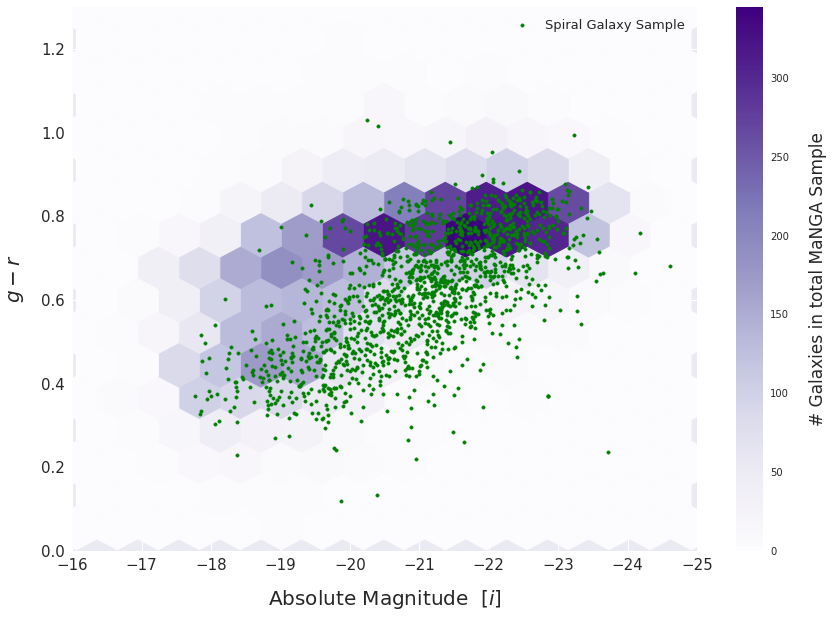

In [10]:
plt.figure(figsize=(14, 10))

hb = plt.hexbin(filt_x1, filt_y1, gridsize=15, cmap=plt.get_cmap('Purples'))
plt.scatter(imag_array[sample_indices], np.subtract(gmag_array, rmag_array)[sample_indices], marker = '.',
            label='Spiral Galaxy Sample', color='green')

cb = plt.colorbar(hb)
cb.set_label('# Galaxies in total MaNGA Sample', size=17, labelpad=20)
#plt.scatter(imag_array[non_sample_indices], np.subtract(gmag_array, rmag_array)[non_sample_indices], marker='x',
#            label='Total MaNGA Sample')

plt.xlim(-16, -25)
plt.ylim(0, 1.3)

plt.xlabel('Absolute Magnitude  $[i]$', size=20, labelpad = 15)
plt.ylabel('$g - r$', size=20, labelpad = 15)

plt.xticks(size=15)
plt.yticks(size=15)

plt.legend(fontsize=13)

In [11]:
mass_array_lg = np.log10(mass_array)

[WARNING]: invalid value encountered in log10 (RuntimeWarning)


In [12]:
x2 = mass_array_lg[non_sample_indices]
y2 = z_array[non_sample_indices]

In [13]:
filt_x2 = x2.copy()
filt_y2 = y2.copy()

indices2del2 = []

for i in range(len(x2)):
    if (x2[i] > 12) or (x2[i] < 8) or (y2[i] > 0.16) or (y2[i] < 0):
        indices2del2.append(i)

In [14]:
filt_x2 = np.delete(filt_x2, indices2del2)
filt_y2 = np.delete(filt_y2, indices2del2)

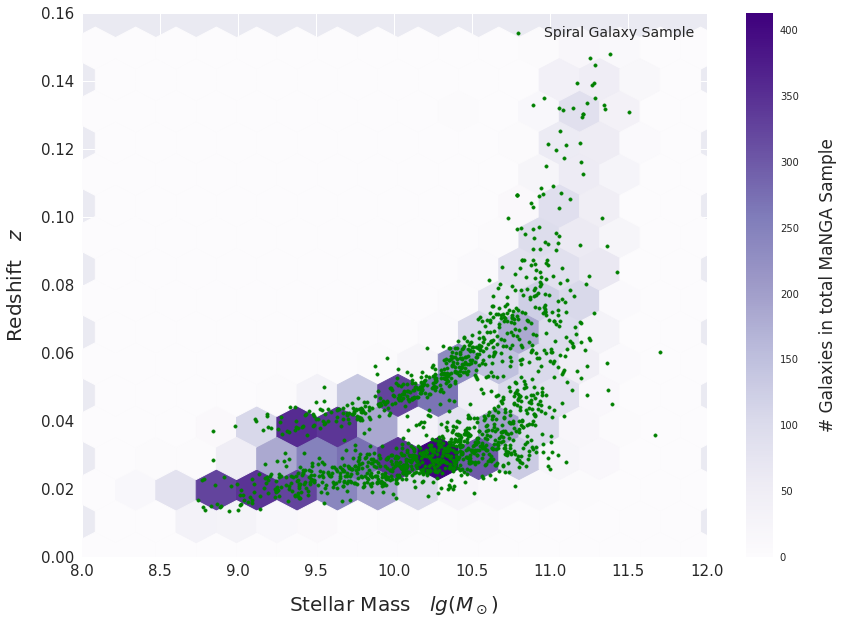

In [15]:
plt.figure(figsize=(14, 10))

hb = plt.hexbin(filt_x2, filt_y2, gridsize=15, cmap=plt.get_cmap('Purples'))
#plt.scatter(mass_array_lg[non_sample_indices], z_array[non_sample_indices], marker='x',
#            label='Total MaNGA Sample')
plt.scatter(mass_array_lg[sample_indices], z_array[sample_indices], marker = '.',
            label='Spiral Galaxy Sample', color='green')

cb = plt.colorbar(hb)
cb.set_label('# Galaxies in total MaNGA Sample', size=17, labelpad=20)

plt.xlim(8, 12)
plt.ylim(0, 0.16)

plt.xlabel('Stellar Mass   $lg(M_\odot)$', size=20, labelpad = 15)
plt.ylabel('Redshift   $z$', size=20, labelpad = 15)

plt.xticks(size=15)
plt.yticks(size=15)

plt.legend(fontsize=14)